# Tutoriel 3

## Exercice 1

### a) Calculate and display the displacement, velocity and acceleration of the system between t=0 to t=2s.

Text(0.5, 1.0, 'Accelération')

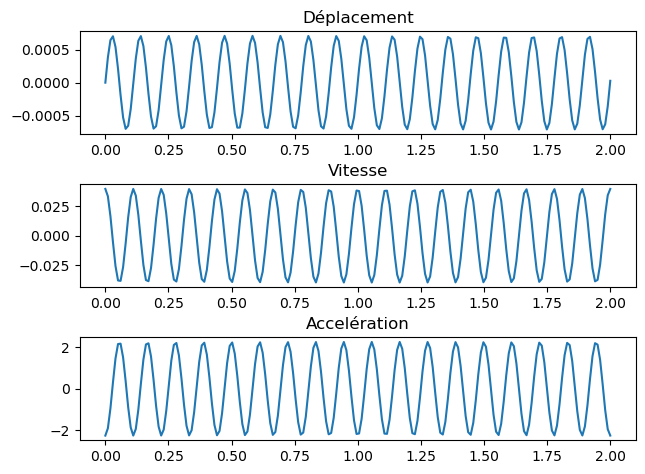

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Données
m = 62.5e-3 # kg
k = 200 # N/m
g = 9.8 # m/s²
v0 = 4e-2 # m/s = 4 cm/s
x0 = 0 # m
freq_e = 100 # Hz

samples = 2 * freq_e
t = np.linspace(0, 2, samples)

w0 = np.sqrt(k/m)
A = np.sqrt(x0**2 + (v0/w0)**2)
phi = 0

x = A * np.sin(w0*t+phi)
v = A * w0 * np.cos(w0*t+phi)
a = A * w0**2 * -(np.cos(w0*t+phi))

fig, axs = plt.subplots(3,1)
fig.tight_layout(pad=1.5)
axs[0].plot(t, x)
axs[0].set_title("Déplacement")
axs[1].plot(t, v)
axs[1].set_title("Vitesse")
axs[2].plot(t, a)
axs[2].set_title("Accelération")

### b) Implement a function « free_response » that takes the mass m, the stiffness k , the time axis t and the initial conditions x<sub>0</sub>=0 and v<sub>0</sub>=4 cm⁄s, and returns the displacement of the free response x(t)

In [15]:
def free_response(m, k, t, x0=0, v0=4e-2):
    w0 = np.sqrt(k/m)
    A = np.sqrt(x0**2 + (v0/w0)**2)
    phi = None
    if w0!=0 and v0!=0 and x0!=0:
        phi = np.arctan(v0 / (x0 * w0))
    else:
        phi = 0
    return A * np.sin(w0*t+phi)

#### i. Evaluate the response for For m=60g and k=200 N/m. Use the same initial conditions as before

Text(0.5, 1.0, 'm=60g, k=200N/m')

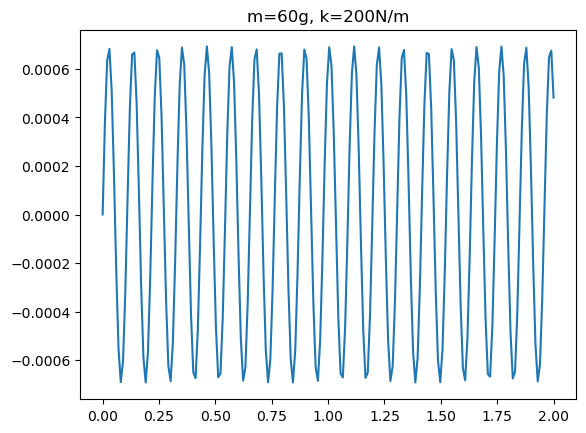

In [16]:
fig, axs = plt.subplots(1,1)
axs.plot(t, free_response(60e-3, 200, t))
axs.set_title("m=60g, k=200N/m")

#### ii. Display the responses for different mass (m=30,60 and 100g) for the same k=400 (this can be easily calculated). How the mass affects the response ?

Text(0.5, 1.0, 'm=100g, k=400N/m')

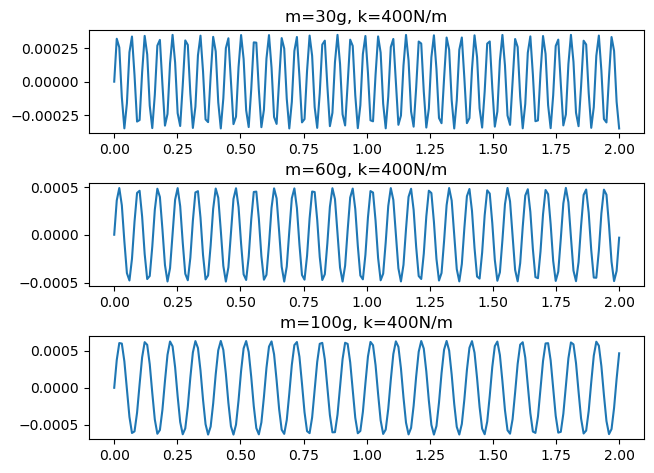

In [18]:
fig, axs = plt.subplots(3,1)
fig.tight_layout(pad=1.5)
axs[0].plot(t, free_response(30e-3, 400, t))
axs[0].set_title("m=30g, k=400N/m")
axs[1].plot(t, free_response(60e-3, 400, t))
axs[1].set_title("m=60g, k=400N/m")
axs[2].plot(t, free_response(100e-3, 400, t))
axs[2].set_title("m=100g, k=400N/m")

On remarque que plus la masse est importante, plus l'oscillation est ample et lente.

#### iii. Display the responses for different stiffness (k=100, 200 and 400 N/m). How the stiffness affects the response ?

Text(0.5, 1.0, 'm=60g, k=400N/m')

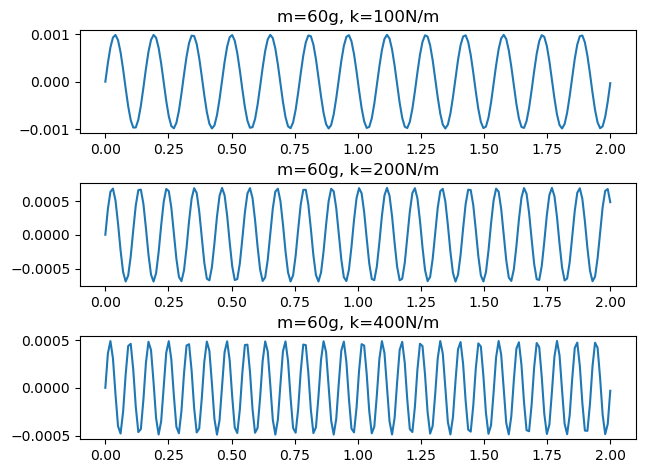

In [19]:
fig, axs = plt.subplots(3,1)
fig.tight_layout(pad=1.5)
axs[0].plot(t, free_response(60e-3, 100, t))
axs[0].set_title("m=60g, k=100N/m")
axs[1].plot(t, free_response(60e-3, 200, t))
axs[1].set_title("m=60g, k=200N/m")
axs[2].plot(t, free_response(60e-3, 400, t))
axs[2].set_title("m=60g, k=400N/m")

Plus la rigidité du ressort est petite, plus l'oscillation est lente et ample.

## Exercice 2
### a) Calculate and display the displacement of the system between t=0 to t=20s

Text(0.5, 1.0, 'Déplacement')

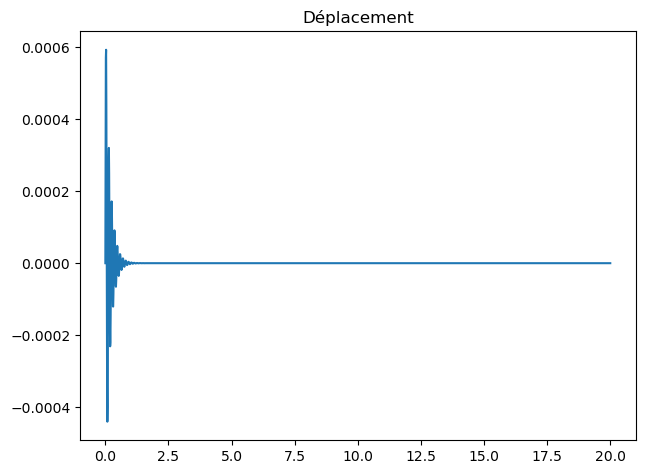

In [28]:
# Données
m = 62.5e-3 # kg
k = 200 # N/m
g = 9.8 # m/s²
v0 = 4e-2 # m/s = 4 cm/s
x0 = 0 # m
freq_e = 100 # Hz
xi = 0.1

samples = 20 * freq_e
t = np.linspace(0, 20, samples)

w0 = np.sqrt(k/m)
wd = w0 * np.sqrt(1 - xi**2)
A = np.sqrt(x0**2 + (v0/w0)**2)
phi = 0

x = A * np.exp(-xi * w0 * t) * np.sin(wd*t+phi)

fig, axs = plt.subplots(1,1)
fig.tight_layout(pad=1.5)
axs.plot(t, x)
axs.set_title("Déplacement")

### b) Implement a function « free_response_damping » that take the mass, the stiffness, the damping factor and the initial conditions x<sub>0</sub> and v<sub>0</sub>, and returns the free response (i.e. the displacement x(t))

In [30]:
def free_response_damping(m, k, xi, t, x0=0, v0=4e-2):
    w0 = np.sqrt(k/m)
    wd = w0 * np.sqrt(1 - xi**2)
    A = np.sqrt(x0**2 + (v0/w0)**2)
    phi = None
    if w0!=0 and v0!=0 and x0!=0:
        phi = np.arctan(v0 / (x0 * w0))
    else:
        phi = 0
    return A * np.exp(-xi * w0 * t) * np.sin(wd * t + phi)

#### i. Display the solution for different damping factor  ξ=0.2,0.1,0.02. Display the results between t=0 and t=20. Comment the results.

Text(0.5, 1.0, 'ξ=0.02')

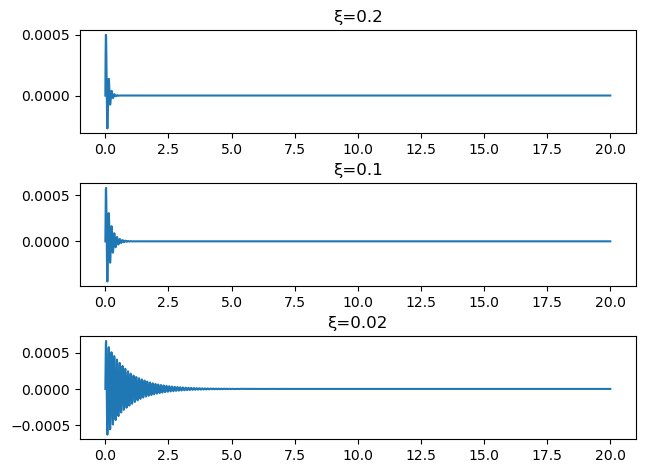

In [31]:
fig, axs = plt.subplots(3,1)
fig.tight_layout(pad=1.5)
axs[0].plot(t, free_response_damping(60e-3, 200, 0.2, t))
axs[0].set_title("ξ=0.2")
axs[1].plot(t, free_response_damping(60e-3, 200, 0.1, t))
axs[1].set_title("ξ=0.1")
axs[2].plot(t, free_response_damping(60e-3, 200, 0.02, t))
axs[2].set_title("ξ=0.02")

Plus le coefficient d'amortissement est faible, plus l'amortissement est long et plus l'oscillation dure.

## Exercice 3 : mass-spring-damper free response
### a) Calculate and display the displacement of the system between t=0 to t=2s.

In [ ]:
# Données
m = 62.5e-3 # kg
k = 200 # N/m
g = 9.8 # m/s²
v0 = 4e-2 # m/s = 4 cm/s
x0 = 0 # m
freq_e = 100 # Hz
xi = 0.001

samples = 2 * freq_e
t = np.linspace(0, 2, samples)

force = 2 * np.cos(18 * t)

# Add 